In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 94 kB 6.2 MB/s  eta 0:00:01
Libraries imported.


In [2]:
CLIENT_ID = 'C0S23INNSHUDFD4ZYYBSZARVQPA5UM1RHYQJ1LWFYLGOONNM' # your Foursquare ID
CLIENT_SECRET = 'U5PVAZ0IBYJV3XBBFRA4GPW3WLYNE4PBTFKW4FDJHU5MUGHM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS = 1000

In [3]:
def getNearbyVenues(loc, lat, lng):
    
    venues_list=[]
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId=4d4b7105d754a06374d81259&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        RADIUS, 
        LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        loc,
        lat, 
        lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Location',
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [4]:
telaviv_venues = []

telaviv_geo = {'Location': ['Rothschild', 'Kikar Hamdina', 'Hatahana', 'TLV Lev', 'Beach', 'Ramat Hahayal', 'Ramat Aviv', 'Drom TA'], 
               'Latitude': [32.06730651855469, 32.0868522, 32.05824516363195, 32.0661324, 32.083150, 32.112790, 32.108110, 32.052250], 
               'Longitude': [34.778079986572266, 34.7898459, 34.76291204921263, 34.7831839, 34.770640, 34.835230, 34.796760, 34.777730]}

telaviv_geo = pd.DataFrame(data=telaviv_geo)

for i in range(len(telaviv_geo.index)):
    temp_venues = getNearbyVenues(loc=telaviv_geo['Location'][i],
                                 lat=telaviv_geo['Latitude'][i], 
                                 lng=telaviv_geo['Longitude'][i])
    
    if i == 0:
        telaviv_venues = temp_venues
    else:
        telaviv_venues = pd.concat([telaviv_venues, temp_venues])
    

In [5]:
telaviv_venues.reset_index(drop=True, inplace = True)
telaviv_venues

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rothschild,32.067307,34.77808,שמנמנת,32.066818,34.779314,Café
1,Rothschild,32.067307,34.77808,(Itzik & Ruti) איציק ורותי,32.068474,34.776812,Sandwich Place
2,Rothschild,32.067307,34.77808,Delicatessen,32.064339,34.777098,Café
3,Rothschild,32.067307,34.77808,Bucke (בוקה),32.070770,34.777895,Café
4,Rothschild,32.067307,34.77808,גרציאני,32.068608,34.780461,Bakery
...,...,...,...,...,...,...,...
596,Drom TA,32.052250,34.77773,Tometomato,32.055378,34.769524,Italian Restaurant
597,Drom TA,32.052250,34.77773,Dganit & The Seven Dwarves (דגנית ושבעת הגמדים),32.059973,34.774175,Café
598,Drom TA,32.052250,34.77773,Cordovero 21,32.056829,34.769490,Diner
599,Drom TA,32.052250,34.77773,Hakabina Cafe,32.056232,34.768933,Café


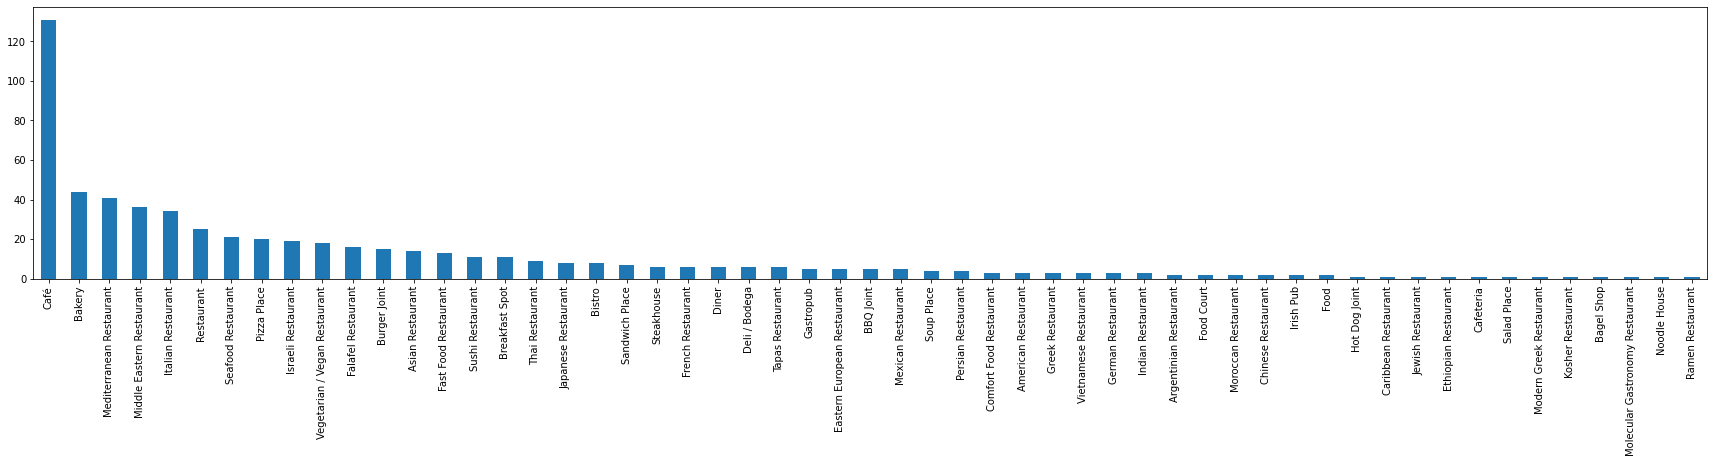

In [6]:
telaviv_venues['Venue Category'].value_counts().plot.bar(figsize=(30,5))

In [7]:
telaviv_venues['Venue Category'].value_counts()

Café                               131
Bakery                              44
Mediterranean Restaurant            41
Middle Eastern Restaurant           36
Italian Restaurant                  34
Restaurant                          25
Seafood Restaurant                  21
Pizza Place                         20
Israeli Restaurant                  19
Vegetarian / Vegan Restaurant       18
Falafel Restaurant                  16
Burger Joint                        15
Asian Restaurant                    14
Fast Food Restaurant                13
Sushi Restaurant                    11
Breakfast Spot                      11
Thai Restaurant                      9
Japanese Restaurant                  8
Bistro                               8
Sandwich Place                       7
Steakhouse                           6
French Restaurant                    6
Diner                                6
Deli / Bodega                        6
Tapas Restaurant                     6
Gastropub                

In [8]:
venues_dic = {'Café': 'Cafe',
             'Bakery': 'Cafe',
             'Breakfast Spot': 'Cafe',
             'Bagel Shop': 'Bakery',
             'Israeli Restaurant': 'Mediterranean Restaurant',
             'Middle Eastern Restaurant': 'Mediterranean Restaurant', 
             'Sushi Restaurant': 'Japanese Restaurant',
             'Ramen Restaurant': 'Japanese Restaurant',
             'Kosher Restaurant': 'Kosher Restaurant',
             'Deli / Bodega': 'Sandwich Place',
             'BBQ Joint': 'Steakhouse',
             'Restaurant': 'Diner',
             'American Restaurant': 'Diner',
             'Food': 'Diner',
             'Hot Dog Joint': 'Fast Food Restaurant',
             'Jewish Restaurant': 'Kosher Restaurant',
             'Noodle House': 'Chinese Restaurant',
             'Salad Place': 'Vegetarian / Vegan Restaurant',
             'Creperie': 'Cafe',
             'Cafeteria': 'Sandwich Place',
             'Modern Greek Restaurant': 'Greek Restaurant'}

telaviv_venues.replace({'Venue Category': venues_dic}, inplace = True)

telaviv_venues['Category Number'] = telaviv_venues.groupby('Venue Category').ngroup()

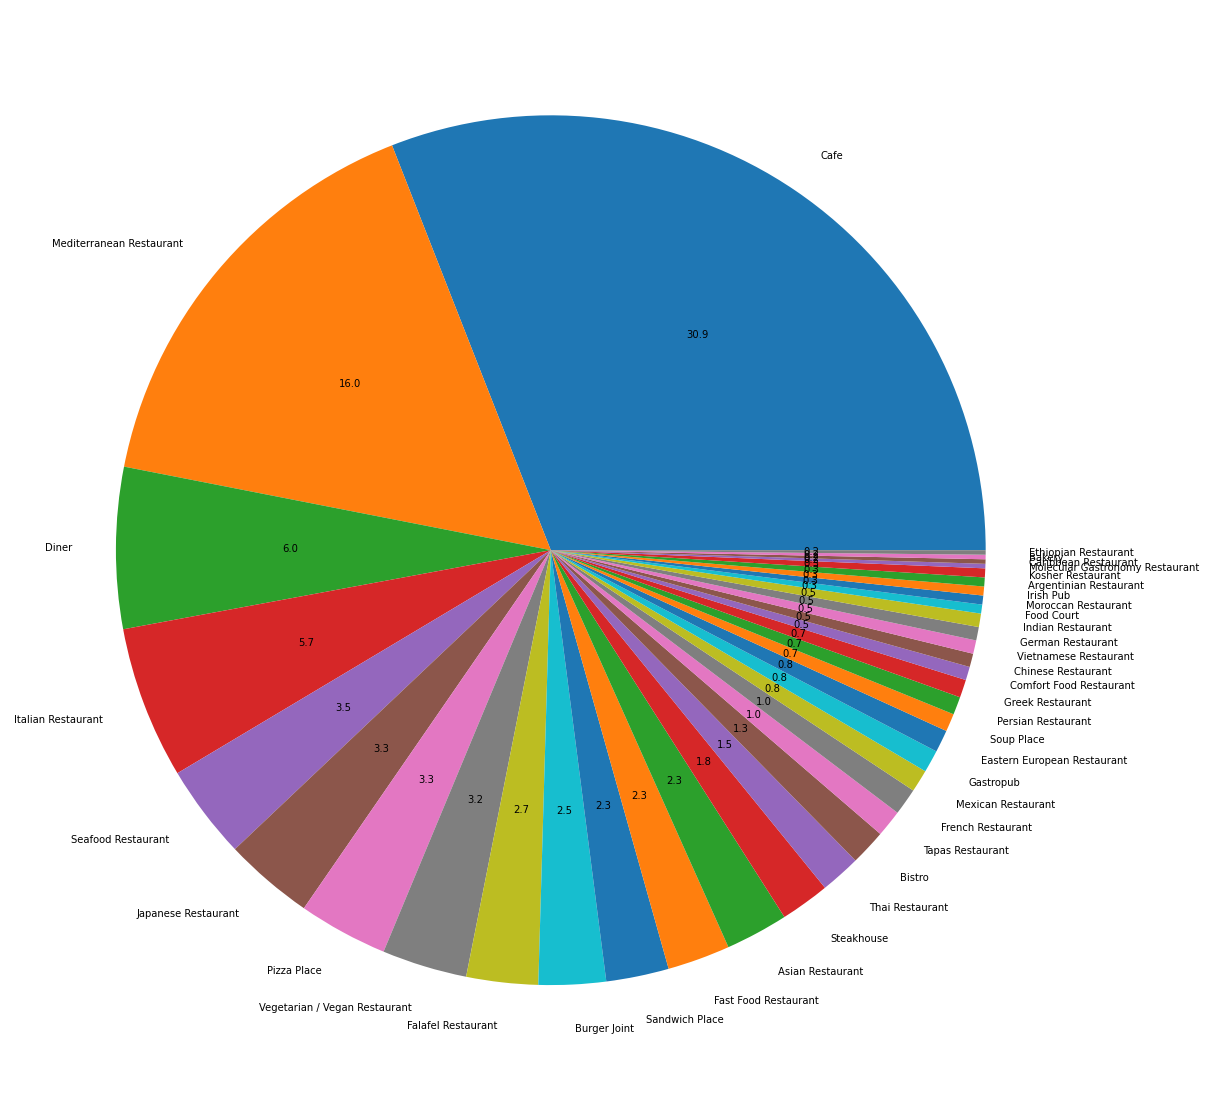

In [9]:
from matplotlib import pyplot as plt 

pie_data = telaviv_venues['Venue Category'].value_counts().reset_index()
pie_data.columns = ['Cat', 'Count']

fig = plt.figure(figsize =(30, 20)) 
plt.pie(pie_data['Count'], labels = pie_data['Cat'], autopct='%.1f') 
  
# show plot 
plt.show() 

In [10]:
address = 'Israel, Tel Aviv'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tel Aviv are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tel Aviv are 32.0852997, 34.7818064.


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# select specific venue category unmark if you want

cat = 'Indian Restaurant'
spec_venues = telaviv_venues[telaviv_venues['Venue Category'] == cat]

#spec_venues = telaviv_venues #mark if you use specific category

# set color scheme for the clusters

x = telaviv_venues['Venue Category'].nunique()
ys = [i + x + (i*x)**2 for i in range(x)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cat_index in zip(spec_venues['Venue Latitude'], spec_venues['Venue Longitude'], spec_venues['Venue'], spec_venues['Venue Category'], spec_venues['Category Number']):
    label = folium.Popup(str(poi) + ' - ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[cat_index],
        fill=True,
        fill_color=rainbow[cat_index],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [27]:
spec_venues.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Category Number
359,TLV Lev,32.066132,34.783184,Ma Pau,32.069523,34.784695,Indian Restaurant,19
424,Beach,32.083150,34.770640,Dosa Bar,32.088751,34.773720,Indian Restaurant,19
578,Drom TA,32.052250,34.777730,24 Rupee,32.053048,34.772101,Indian Restaurant,19


In [28]:
telaviv_group = telaviv_venues.copy()

buiss_col = telaviv_venues['Venue Category'].unique()

for col in buiss_col:
    telaviv_group.loc[telaviv_group['Venue Category'] == col, col] = 1
    telaviv_group.loc[telaviv_group['Venue Category'] != col, col] = 0
    
    
telaviv_group.drop(columns=['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category', 'Category Number'], inplace=True)

telaviv_group = telaviv_group.groupby(['Location','Location Latitude','Location Longitude']).sum()

telaviv_group.head()

,,,Cafe,Sandwich Place,Italian Restaurant,Gastropub,Asian Restaurant,French Restaurant,Mediterranean Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,...,Vietnamese Restaurant,Greek Restaurant,Chinese Restaurant,German Restaurant,Indian Restaurant,Bakery,Irish Pub,Caribbean Restaurant,Food Court,Ethiopian Restaurant
Location,Location Latitude,Location Longitude,,,,,,,,,,,,,,,,,,,,,
Beach,32.083150,34.770640,32.0,6.0,6.0,0.0,1.0,0.0,13.0,1.0,3.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
Drom TA,32.052250,34.777730,11.0,0.0,2.0,0.0,1.0,0.0,10.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Hatahana,32.058245,34.762912,21.0,1.0,6.0,0.0,2.0,1.0,26.0,2.0,2.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kikar Hamdina,32.086852,34.789846,38.0,1.0,3.0,0.0,1.0,0.0,8.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ramat Aviv,32.108110,34.796760,19.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [29]:
res = telaviv_group.loc[:, 'Cafe':'Ethiopian Restaurant'].apply(lambda x: pd.Series(np.concatenate([x.nlargest(5).index.values])), axis=1)
telaviv_group[["N1 Venue Type", "N2 Venue Type", "N3 Venue Type", "N4 Venue Type", "N5 Venue Type"]] = res

telaviv_group.drop(telaviv_group.columns.to_series()['Cafe':'Ethiopian Restaurant'], axis=1, inplace = True)
telaviv_group.head(10)

,,,N1 Venue Type,N2 Venue Type,N3 Venue Type,N4 Venue Type,N5 Venue Type
Location,Location Latitude,Location Longitude,,,,,
Beach,32.083150,34.770640,Cafe,Mediterranean Restaurant,Sandwich Place,Italian Restaurant,Seafood Restaurant
Drom TA,32.052250,34.777730,Cafe,Mediterranean Restaurant,Diner,Italian Restaurant,Eastern European Restaurant
Hatahana,32.058245,34.762912,Mediterranean Restaurant,Cafe,Diner,Italian Restaurant,Seafood Restaurant
Kikar Hamdina,32.086852,34.789846,Cafe,Mediterranean Restaurant,Pizza Place,Italian Restaurant,Fast Food Restaurant
Ramat Aviv,32.108110,34.796760,Cafe,Mediterranean Restaurant,Pizza Place,Fast Food Restaurant,Bistro
Ramat Hahayal,32.112790,34.835230,Cafe,Mediterranean Restaurant,Fast Food Restaurant,Sandwich Place,Italian Restaurant
Rothschild,32.067307,34.778080,Cafe,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Diner,Italian Restaurant
TLV Lev,32.066132,34.783184,Cafe,Italian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant


In [30]:
telaviv_cluster = telaviv_venues.copy()

buiss_col = telaviv_venues['Venue Category'].unique()

for col in buiss_col:
    telaviv_cluster.loc[telaviv_cluster['Venue Category'] == col, col] = 1
    telaviv_cluster.loc[telaviv_cluster['Venue Category'] != col, col] = 0
    
telaviv_cluster = telaviv_cluster.groupby(['Location','Location Latitude','Location Longitude']).sum()
telaviv_cluster.drop(columns=['Venue Latitude','Venue Longitude','Category Number'], inplace=True)

In [31]:
telaviv_cluster.head(10)

,,,Cafe,Sandwich Place,Italian Restaurant,Gastropub,Asian Restaurant,French Restaurant,Mediterranean Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,...,Vietnamese Restaurant,Greek Restaurant,Chinese Restaurant,German Restaurant,Indian Restaurant,Bakery,Irish Pub,Caribbean Restaurant,Food Court,Ethiopian Restaurant
Location,Location Latitude,Location Longitude,,,,,,,,,,,,,,,,,,,,,
Beach,32.083150,34.770640,32.0,6.0,6.0,0.0,1.0,0.0,13.0,1.0,3.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
Drom TA,32.052250,34.777730,11.0,0.0,2.0,0.0,1.0,0.0,10.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Hatahana,32.058245,34.762912,21.0,1.0,6.0,0.0,2.0,1.0,26.0,2.0,2.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kikar Hamdina,32.086852,34.789846,38.0,1.0,3.0,0.0,1.0,0.0,8.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ramat Aviv,32.108110,34.796760,19.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Ramat Hahayal,32.112790,34.835230,12.0,3.0,3.0,0.0,2.0,1.0,6.0,0.0,1.0,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Rothschild,32.067307,34.778080,25.0,1.0,5.0,3.0,3.0,2.0,21.0,1.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TLV Lev,32.066132,34.783184,28.0,2.0,9.0,2.0,4.0,2.0,8.0,1.0,4.0,3.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


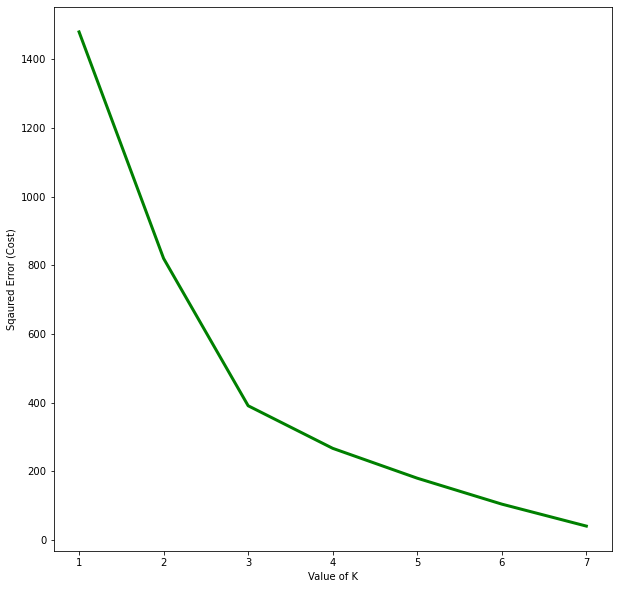

In [41]:
from sklearn.cluster import KMeans
cost =[]

for i in range(1, 8): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(telaviv_cluster) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)

#Plot results

plt.figure(figsize=(10,10))
plt.plot(range(1, 8), cost, color ='g', linewidth ='3')

plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(telaviv_cluster)
kmeans.labels_

array([2, 0, 1, 2, 0, 0, 1, 2], dtype=int32)

In [43]:
telaviv_group['Cluster'] = kmeans.labels_

telaviv_group.head(10)

,,,N1 Venue Type,N2 Venue Type,N3 Venue Type,N4 Venue Type,N5 Venue Type,Cluster
Location,Location Latitude,Location Longitude,,,,,,
Beach,32.083150,34.770640,Cafe,Mediterranean Restaurant,Sandwich Place,Italian Restaurant,Seafood Restaurant,2
Drom TA,32.052250,34.777730,Cafe,Mediterranean Restaurant,Diner,Italian Restaurant,Eastern European Restaurant,0
Hatahana,32.058245,34.762912,Mediterranean Restaurant,Cafe,Diner,Italian Restaurant,Seafood Restaurant,1
Kikar Hamdina,32.086852,34.789846,Cafe,Mediterranean Restaurant,Pizza Place,Italian Restaurant,Fast Food Restaurant,2
Ramat Aviv,32.108110,34.796760,Cafe,Mediterranean Restaurant,Pizza Place,Fast Food Restaurant,Bistro,0
Ramat Hahayal,32.112790,34.835230,Cafe,Mediterranean Restaurant,Fast Food Restaurant,Sandwich Place,Italian Restaurant,0
Rothschild,32.067307,34.778080,Cafe,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Diner,Italian Restaurant,1
TLV Lev,32.066132,34.783184,Cafe,Italian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant,2
